# **Proyecto 3: Clasificación de Texto**

https://www.kaggle.com/datasets/aadyasingh55/twitter-emotion-classification-dataset

Carmen Lozano López, María Victoria Rodríguez del Corral y María Millán Gordillo.

In [1]:
# Download data with gdown
# !gdown --id 1EguY8W_h17XnMeBd9AVlzPZj9Q6D_IFZ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EguY8W_h17XnMeBd9AVlzPZj9Q6D_IFZ
To: /content/train-00000-of-00001.parquet
100% 26.9M/26.9M [00:00<00:00, 55.3MB/s]


In [2]:
# Load parquet data using pandas
import pandas as pd

df = pd.read_parquet('train-00000-of-00001.parquet')

In [ ]:
# Explore data
print("\n Some data: \n", df.head())

print("\n Data shape: \n", df.shape)

# Count number of samples per class
print("\n Number of samples per class: \n", df['label'].value_counts())


 Some data: 
                                                 text  label
0  i feel awful about it too because it s my job ...      0
1                              im alone i feel awful      0
2  ive probably mentioned this before but i reall...      1
3           i was feeling a little low few days back      0
4  i beleive that i am much more sensitive to oth...      2

 Data shape: 
 (416809, 2)

 Number of samples per class: 
 label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64


In [4]:
# Use NLTK to remove stop words

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# List stop words for english
stop_words = set(stopwords.words('english'))
print(stop_words)

{'itself', 'haven', 'against', 'into', "weren't", 'very', 'off', "you've", 'm', 'has', "needn't", 'our', "you'll", 'wouldn', 'where', 'will', 'about', 'should', 'or', 'because', 'more', 'did', 'had', 'most', 'theirs', 'why', "she's", 'mightn', 'isn', 'd', "hadn't", 'are', 'herself', 'yourselves', 'under', 'any', 'o', "wasn't", 'with', 'shan', 'an', 'up', 'couldn', 'themselves', 'through', 'below', 'him', 'she', 'down', 'in', 'between', 'can', 'aren', 'that', 'again', 'and', "doesn't", 'am', 'same', 'hasn', 'ma', 'shouldn', 't', 'his', 's', 'further', 'until', "wouldn't", "don't", 'was', 'having', 'myself', 'ourselves', 'doing', 'hadn', 'there', 'while', 'only', "didn't", 'they', 'what', 'does', 'once', "haven't", 'won', 'he', 'few', 'didn', 'how', "mightn't", 'wasn', 'its', 'by', 'some', 'other', 'do', "shan't", 'don', "it's", 'you', 'it', "shouldn't", 'just', 'i', 'as', 'were', 'have', 'too', 'above', 'this', 'then', 'those', 'all', 'which', 'such', 'be', 'before', "should've", 'durin

In [ ]:
# Example code to show how stop words filtering works

sentence = df['text'][3]

word_tokens = word_tokenize(sentence)

filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

print(word_tokens)
print(filtered_sentence)

['i', 'was', 'feeling', 'a', 'little', 'low', 'few', 'days', 'back']
['feeling', 'little', 'low', 'days', 'back']


In [ ]:
# Function to filter stop words

def filter_stop_words(text):
  stop_words = set(stopwords.words('english'))

  word_tokens = word_tokenize(text)

  filtered_text = [w for w in word_tokens if not w.lower() in stop_words]

  return ' '.join(filtered_text)

In [8]:
# Test filter_stop_words function
print(filter_stop_words(df['text'][3]))

feeling little low days back


In [ ]:
# Add an additional column 'filtered_text' to df appying stop_words_function to column 'text'
df['filtered_text'] = df['text'].apply(filter_stop_words)

In [10]:
# Verify the result
df.head()

,text,label,filtered_text
0,i feel awful about it too because it s my job ...,0,feel awful job get position succeed happen
1,im alone i feel awful,0,im alone feel awful
2,ive probably mentioned this before but i reall...,1,ive probably mentioned really feel proud actua...
3,i was feeling a little low few days back,0,feeling little low days back
4,i beleive that i am much more sensitive to oth...,2,beleive much sensitive peoples feelings tend c...



**Observaciones**

* En este momento los datos son textos filtrados de largo variable y una etiqueta de clase. Para poder proceder a la clasificación vamos a representar los textos con un vector numérico.
* CountVectorizer de sklearn tiene opciones de lower case y remoción de stop words.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Process filtered_text with CountVectorizer limiting to 20000 words
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['filtered_text'])

In [12]:
# Display X shape
print(X.shape)

(416809, 1000)


In [ ]:
# Train and test split
from sklearn.model_selection import train_test_split
import random
random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.5, random_state=42, stratify=df['label'])

# Proyecto

El proyecto tiene por objetivo desarrollar un clasificador que permita clasificar los textos maximizando el accuracy.

Es importante que observen que en el código de referencia se limitaron las cantidad de palabras a 5000 cuando el total de palabras es significativamente mayor (puede probar CountVectorizer sin limitar el número de palabras para obtener el número total).

## Opción 1:
Desarrollar la solución mediante técnicas clásicas de clasificación.

## Opición 2:
Implementar la solución usando redes neuronales.

# **OPCIÓN 1**

Vamos a tratar de resolver el problema de clasificación empleando técnicas clásicas.

A continuación, vamos a realizar una comparación de distintas técnicas empleando los parámetros por defecto.

## MultinomialNB

El modelo Multinomial Naive Bayes (MultinomialNB) es una variante del algoritmo Naive Bayes que se suele usar en problemas de clasificación donde las características representan conteos o frecuencias discretas.
* Asumimos que las características son condicionalmente independientes entre sí, dado la clase objetivo.
* Datos de entrada siguen una distribución multinomial.


In [ ]:
from sklearn.naive_bayes import MultinomialNB
import time

# Create the model
model = MultinomialNB()

# Train the model
empieza=time.time()
model.fit(X_train, y_train)
fin=time.time()

print('Tiempo de entrenamiento', fin - empieza)

# Predict the model
empieza=time.time()
y_pred = model.predict(X_test)
fin=time.time()

print('Tiempo de predicción', fin-empieza)


print('El accuracy del modelo es', model.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
print('Matriz de confusión')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Tiempo de entrenamiento 0.05993056297302246
Tiempo de predicción 0.021675586700439453
El accuracy del modelo es 0.8632806314627768
Matriz de confusión
[[55531  2543   268  1247   890   115]
 [ 2310 64623  2336   467   511   287]
 [  511  3910 12543   185   101    27]
 [ 2398  2290   185 22983   740    62]
 [ 1789  1384    89   916 18828   850]
 [  150   728    44    48  1112  5404]]


Con este modelo obtenemos un accuracy del 86% evaluando en el conjunto de test. Vemos que es muy eficiente ya que tarda 0.05 segundos en entrenarse y 0.021 en realizar la predicción.

## LDA

LDA se basa en un modelo probabilístico generativo que utiliza principios de probabilidad. Creemos que puede ofrecernos buenos resultados debido a que separa múltiples clases con múltiples características mediante la reducción de la dimensionalidad de los datos.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import time

# Create the model
model = LDA()

# Train the model
empieza=time.time()
model.fit(X_train.toarray(), y_train)
fin=time.time()

print('Tiempo de entrenamiento', fin - empieza)

# Predict the model
empieza=time.time()
y_pred = model.predict(X_test)
fin=time.time()

print('Tiempo de predicción', fin-empieza)

print('El accuracy del modelo es', model.score(X_test, y_test))

print('Matriz de confusión')
cm = confusion_matrix(y_test, y_pred)
print(cm)

Tiempo de entrenamiento 91.57662057876587
Tiempo de predicción 0.022758007049560547
El accuracy del modelo es 0.861092584151052
Matriz de confusión
[[52967  3625   483  1731  1530   258]
 [ 1113 63810  4207   429   544   431]
 [  149  2478 14440    70    68    72]
 [  833  3525   161 23235   783   121]
 [  487  2092   101   765 18563  1848]
 [   55   730    32    16   212  6441]]


Observamos que obtenemos un accuracy similar al anterior pero el tiempo de entrenamiento es mucho más alto, en contraste la predicción es ligeramente más rápida. Aunque por ahora, dados estos resultados consideramos que es mejor el modelo anterior.

In [ ]:
# Limpiamos caché de colab
import gc
gc.collect()

3385

## GaussianNB

Gaussian Naive Bayes es una variante del modelo Naive Bayes que se utiliza cuando los atributos del modelo:
* son continuas
*se asume que estas características siguen una distribución normal (gaussiana).
*Se supone que las características son independientes entre sí, dado la clase.


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create the model
model = GaussianNB()

# Train the model
empieza=time.time()
model.fit(X_train.toarray(), y_train)
fin=time.time()

print('Tiempo de entrenamiento', fin - empieza)

# Predict the model
empieza=time.time()
y_pred = model.predict(X_test.toarray())
fin=time.time()

print('Tiempo de predicción', fin-empieza)

print('El accuracy del modelo es', model.score(X_test.toarray(), y_test))

print('Matriz de confusión')
cm = confusion_matrix(y_test, y_pred)
print(cm)

Tiempo de entrenamiento 12.638181924819946
Tiempo de predicción 12.586576700210571
El accuracy del modelo es 0.6852378781699096
Matriz de confusión
[[43368   318  1569  1566  1569 12204]
 [  483 40534  8629   315   544 20029]
 [  148   354 14539    82    71  2083]
 [  481   160   751 20854  1092  5320]
 [  366   167   257   459 16421  6186]
 [   64    91   105    25   110  7091]]


El resultado obtenido con este modelo es mucho peor que los anteriores, esto puede ser debido a que este modelo asume que los atributos de entrada tienen una distribución continua y simétrica alrededor de la media. Sin embargo, los valores de los atributos, como las frecuencias de palabras, son típicamente enteros no negativos, y no siguen distribuciones normales. Las frecuencias de las palabras pueden ser bajas para muchas palabras en un documento, lo que hace que no se ajusten bien al modelo gaussiano.

Por otro lado, MultinomialNB hemos visto que ofrece mejores resultados, esto puede deberse a que considera las palabras como eventos discretos, lo que se asemeja más a la realidad.

## Árboles de decisión

También hemos tratado de resolver el problema empleando árboles de decisión ya que están basados en reglas que son fáciles de interpretar. Por ejemplo:
* Si el texto contiene ciertas palabras, se podría dirigir a cierta categoría.

Además, seleccionan las características o palabras que realmente ayudan a distinguir entre clases y trabajan bien en entornos con dispersión de datos, que es un escenario frecuente ya que muchas palabras que están en el volcabulario no aparecen en todas las muestras.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
model = DecisionTreeClassifier()

# Train the model
empieza=time.time()
model.fit(X_train, y_train)
fin=time.time()

print('Tiempo de entrenamiento', fin - empieza)

# Predict the model
empieza=time.time()
y_pred = model.predict(X_test)
fin=time.time()

print('Tiempo de predicción', fin-empieza)

print('El accuracy del modelo es', model.score(X_test, y_test))

print('Matriz de confusión')
cm = confusion_matrix(y_test, y_pred)
print(cm)

Tiempo de entrenamiento 94.10892748832703
Tiempo de predicción 0.22374463081359863
El accuracy del modelo es 0.811381684700463
Matriz de confusión
[[53023  2367   592  2471  1904   237]
 [ 3203 59268  4388  1727  1304   644]
 [  490  4910 11332   310   189    46]
 [ 2594  1534   242 22919  1277    92]
 [ 1752  1262   171  1635 17701  1335]
 [  172   759    43    62  1597  4853]]


Observamos que el rendimiento obtenido es inferior al de MultinomialNB y que, además, tanto el entrenamiento como la predicción son más lentos.

Aunque intentemos encontrar los hiperparámetros óptimos, el tiempo de entrenamiento y predicción es significativamente mayor en comparación con MultinomialNB, por lo que no consideramos probable obtener un modelo más eficiente.

## Random Forest

Hemos intentado abordar el problema utilizando Random Forest, ya que es un modelo basado en la combinación de varios árboles de decisión, lo que creemos puede ofrecer un buen rendimiento al aprovechar la diversidad y robustez de los árboles individuales.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(n_estimators=20)

# Train the model
empieza=time.time()
model.fit(X_train, y_train)
fin=time.time()

print('Tiempo de entrenamiento', fin - empieza)

# Predict the model
empieza=time.time()
y_pred = model.predict(X_test)
fin=time.time()

print('Tiempo de predicción', fin-empieza)

print('El accuracy del modelo es', model.score(X_test, y_test))

print('Matriz de confusión')
cm = confusion_matrix(y_test, y_pred)
print(cm)

Tiempo de entrenamiento 127.04644393920898
Tiempo de predicción 5.449697971343994
El accuracy del modelo es 0.8339867085722511
Matriz de confusión
[[53934  1704   448  2404  1846   258]
 [ 2610 60650  4319  1254   967   734]
 [  305  4509 12014   264   133    52]
 [ 1995  1662   183 23459  1271    88]
 [ 1298  1079    83  1411 18475  1510]
 [  120   610    21    40  1420  5275]]


Efectivamente, el resultado obtenido con Random Forest es superior al de un solo árbol de decisión. Sin embargo, el tiempo de entrenamiento es mayor.

A pesar de esto, no logramos obtener mejores resultados que con MultinomialNB, y, al igual que en el caso de los árboles de decisión, dado que el tiempo de entrenamiento y predicción es considerablemente mayor, no consideramos probable obtener un modelo más eficiente.


# **OPCIÓN 2**

Vamos a tratar de resolver el problema de clasificación creando nuestro propio modelo.

Para ello vamos a emplear dos capas densas con 16 y 8 neuronas respectivamente y ambas con función de activación relu. Finalmente, cuenta también con una capa de salida de 6 neuronas (ya que estamos tratando de clasificar en 6 clases) y función de activación softmax para que nos devuelva la probabilidad de pertenecer a cada clase.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7150 - loss: 0.7628 - val_accuracy: 0.8620 - val_loss: 0.3531
Epoch 2/10
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8711 - loss: 0.3291 - val_accuracy: 0.8645 - val_loss: 0.3331
Epoch 3/10
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8736 - loss: 0.3116 - val_accuracy: 0.8648 - val_loss: 0.3272
Epoch 4/10
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8780 - loss: 0.2933 - val_accuracy: 0.8635 - val_loss: 0.3240
Epoch 5/10
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8775 - loss: 0.2899 - val_accuracy: 0.8636 - val_loss: 0.3215
Epoch 6/10
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8807 - loss: 0.2826 - val_accuracy: 0.8628 - val_loss: 0.3206
Epoch 7/10
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8840 - loss: 0.2728 - val_accuracy: 0.8632 - val_loss: 0.3220
Epoch 8/10
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8860 - loss: 0

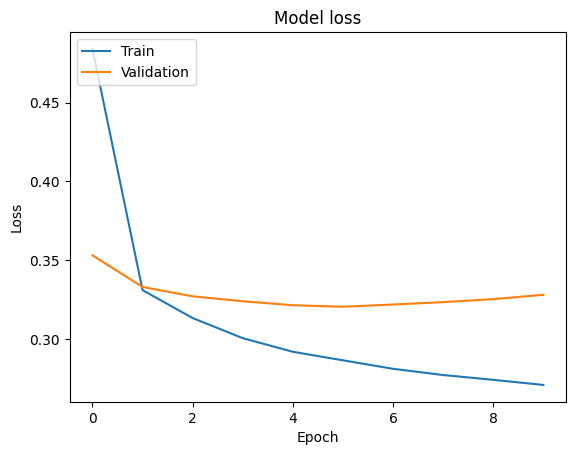

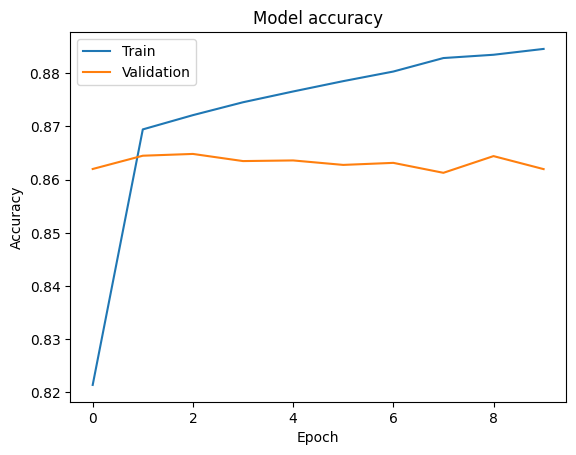

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

empieza=time.time()
history=model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.2)
fin=time.time()

print('Tiempo de entrenamiento', fin - empieza)

empieza=time.time()
y_pred = model.predict(X_test.toarray())
fin=time.time()

print('Tiempo de predicción', fin-empieza)

print('El accuracy del modelo es', model.evaluate(X_test.toarray(), y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Obtenemos un accuracy del 86% en el conjunto de test.

Observando las gráficas, en la gráfica del loss observamos que mientras que en el conjunto de entrenamiento sigue disminuyendo, en el conjunto de validación parece que se estanca e incluso empieza a aumentar, esto podría sugerirnos la presencia de un ligero sobreajuste.

Lo mismo ocurre con la gráfica de accuracy, mientras que en el conjunto de entrenamiento sigue aumentando a lo largo de los distintos epochs, en el conjunto de test parece que se estanca en torno a unos valores.

Vamos a tratar de emplear modelos más complejos. Vamos a crear un modelo que consta de:
* Capa de **Embedding** para convertir los vectores en vectores densos de tamaño fijo. El objetivo de esta capa es transformar las representaciones discretas de palabras en un espacio continuo.
* Capa **RNN**, diseñada para trabajar con datos secuenciales, como texto. A diferencia de las redes Densas, las RNN tienen conexiones que retroalimentan a la propia capa, lo que les permite recordar información de pasos anteriores y capturar patrones a lo largo de secuencias de datos.
En este caso, la iniciamos con 16 neuronas.
* A continuación añadimos una capa **Densa**, con 8 neuronas y con función de activación relu.
* Finalmente,la capa de salida, una capa **Densa** con 6 neuronas y funcion de activación softmax para que nos devuelva la probabilidad de cada clase.

Creemos que este modelo puede ofrecer un mejor resultado ya que el orden de las palabras influye y al emplear capas densas no estamos teniendo en cuenta las palabras anteriores.


Epoch 1/5
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 540s 103ms/step - accuracy: 0.3264 - loss: 1.5909 - val_accuracy: 0.3400 - val_loss: 1.5736
Epoch 2/5
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 548s 101ms/step - accuracy: 0.3389 - loss: 1.5742 - val_accuracy: 0.3400 - val_loss: 1.5729
Epoch 3/5
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 563s 101ms/step - accuracy: 0.3399 - loss: 1.5727 - val_accuracy: 0.3400 - val_loss: 1.5727
Epoch 4/5
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 529s 102ms/step - accuracy: 0.3376 - loss: 1.5747 - val_accuracy: 0.3400 - val_loss: 1.5727
Epoch 5/5
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 559s 101ms/step - accuracy: 0.3375 - loss: 1.5744 - val_accuracy: 0.3400 - val_loss: 1.5731
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 237s 36ms/step - accuracy: 0.3371 - loss: 1.5728
El accuracy del modelo es [1.5733022689819336, 0.3384467661380768]


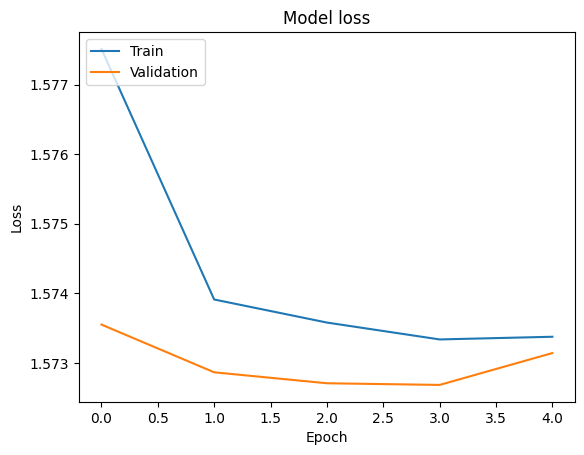

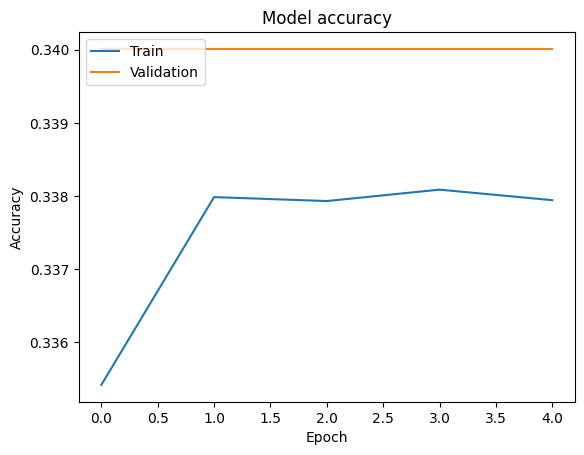

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding

model = Sequential()
model.add(Embedding(input_dim=X_train.shape[1], output_dim=16, input_length=X_train.shape[1]))
model.add(SimpleRNN(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train.toarray(), y_train, epochs=5, batch_size=32, validation_split=0.2)

print('El accuracy del modelo es', model.evaluate(X_test.toarray(), y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observamos que este modelo produce peores resultados, aunque en este caso no estamos enfrentando un sobreajuste. Además, el tiempo de ejecución fue considerablemente mayor (50 minutos), por lo que creemos que es posible obtener mejores resultados de manera más eficiente.

Finalmente, intentaremos utilizar LSTM, ya que son más eficientes que las RNN tradicionales aunque más complejas, para evaluar si conseguimos mejores resultados.

Vamos a crear un modelo que consta de:
* Capa de **Embedding** igual que antes, para convertir los vectores en vectores densos de tamaño fijo.
* Capa **LSTM**, diseñada para recordar información durante períodos más largos y olvidar información irrelevante.
En este caso, la iniciamos con 16 neuronas.
* A continuación añadimos una capa **Densa**, con 8 neuronas y con función de activación relu.
* Finalmente,la capa de salida, una capa **Densa** con 6 neuronas y funcion de activación softmax para que nos devuelva la probabilidad de cada clase.

Epoch 1/5
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 569s 109ms/step - accuracy: 0.3368 - loss: 1.5945 - val_accuracy: 0.3400 - val_loss: 1.5730
Epoch 2/5
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 616s 108ms/step - accuracy: 0.3381 - loss: 1.5723 - val_accuracy: 0.3400 - val_loss: 1.5733
Epoch 3/5
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 626s 109ms/step - accuracy: 0.3372 - loss: 1.5734 - val_accuracy: 0.3400 - val_loss: 1.5751
Epoch 4/5
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 659s 116ms/step - accuracy: 0.3398 - loss: 1.5726 - val_accuracy: 0.3400 - val_loss: 1.5731
Epoch 5/5
5211/5211 ━━━━━━━━━━━━━━━━━━━━ 592s 110ms/step - accuracy: 0.3379 - loss: 1.5748 - val_accuracy: 0.3400 - val_loss: 1.5728
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 278s 43ms/step - accuracy: 0.3371 - loss: 1.5723
El accuracy del modelo es [1.5728827714920044, 0.3384467661380768]


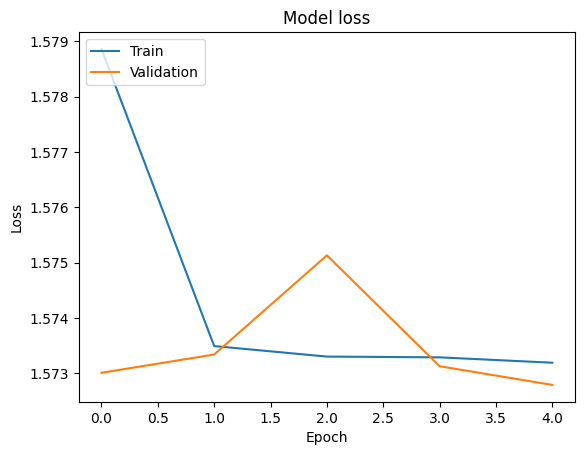

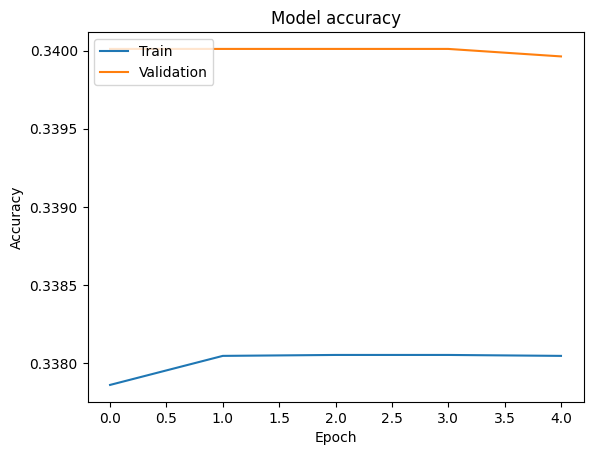

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

model = Sequential()
model.add(Embedding(input_dim=X_train.shape[1], output_dim=16, input_length=X_train.shape[1]))
model.add(LSTM(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train.toarray(), y_train, epochs=5, batch_size=32, validation_split=0.2)

print('El accuracy del modelo es', model.evaluate(X_test.toarray(), y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observamos que el rendimiento es similar al modelo anterior, aunque los tiempos de entrenamiento son ligeramente inferiores.

Observamos que el rendimiento es similar al anterior aunque los tiempos de entrenamiento son ligeramente inferiores.

## **Conclusiones**

Hemos llegado a la conclusión de que, para este problema en particular, emplear modelos más simples y tradicionales, como MultinomialNB o una red neuronal compuesta únicamente por capas densas, es más eficiente y nos permite obtener mejores resultados. En comparación, modelos más complejos, como árboles de decisión o redes neuronales recurrentes, presentan tiempos de entrenamiento significativamente mayores sin ofrecer una mejora sustancial en el rendimiento. Estos modelos complejos, aunque potentes en ciertos contextos, no resultan ser la opción más adecuada para este tipo de tarea debido a su mayor costo computacional y la falta de una mejora considerable en la precisión.